In [1]:
import os
import pathlib
import pprint
import sys


import matplotlib.pyplot as plt
import numpy as np
from spdm.logger import logger
from spdm.data.File import File
from spdm.data.Mapping import Mapping
from fytok.modules.transport.Equilibrium import Equilibrium
from fytok.modules.device.PFActive import PFActive
from fytok.modules.device.Magnetics import Magnetics
from fytok.modules.device.Wall import Wall
from spdm import open_entry

In [2]:
entry = open_entry("file+mdsplus[EAST]:///home/salmon/workspace/data/~t/?tree_name=efit_east#38300",
                       mapping_path="/home/salmon/workspace/fytok_data/mapping")

2022-11-25 18:22:59,258 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/sp_export.py:101:sp_find_module_by_name: Load module spdm.plugins.data.db.PluginMDSplus#MDSplusFile
2022-11-25 18:22:59,260 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/data/File.py:64:__init__: Open MDSplusFile: /home/salmon/workspace/data/~t/ mode='r'
2022-11-25 18:22:59,263 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/sp_export.py:101:sp_find_module_by_name: Load module spdm.plugins.data.file.PluginXML
2022-11-25 18:22:59,265 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/data/File.py:64:__init__: Open XMLFile: [PosixPath('/home/salmon/workspace/fytok_data/mapping/EAST/imas/3/static/config.xml'), PosixPath('/home/salmon/workspace/fytok_data/mapping/EAST/imas/3/dynamic/config.xml')] mode='r'


In [3]:
pf_active=PFActive(entry.get("pf_active"))
magnetics=Magnetics(entry.get("magnetics"))
wall=Wall(entry.get("wall"))



(0.41546950000000005, 3.4470804999999998, -2.28107, 2.2810699999999997)

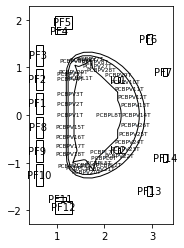

In [4]:
wall.plot()
magnetics.plot()
pf_active.plot()
plt.axis('scaled')

In [6]:
magnetics.b_field_tor_probe[2].field(1.2)*2


0.19158394705473378

In [ ]:
time_slice = 50

desc = entry.get(["equilibrium", "time_slice", time_slice]).dump()

desc["time"] = 1.2345

desc["vacuum_toroidal_field"] = {
    "b0": entry.get(["equilibrium", "vacuum_toroidal_field", "b0"])[time_slice],
    "r0": entry.get(["equilibrium", "vacuum_toroidal_field", "r0"])[time_slice],
}

eq = Equilibrium(desc)


print(eq.global_quantities.ip)


2022-11-22 11:42:08,812 ERROR [spd] /home/salmon/workspace/SpDB/python/spdm/plugins/data/db/PluginMDSplus.py:127:fetch: No data! tree_name=efit_east shot=38300 tdi="DATA(\BETAN)[50]" 
 %TREE-E-NODATA, No data available for this node
399225.10782877606


(1.13, 2.670000000000001, -1.3200000000000003, 1.3200000000000003)

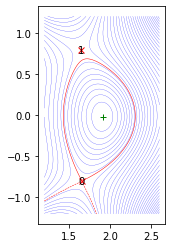

In [ ]:
eq.plot(contour=np.linspace(-1,5,50))
plt.axis('scaled')

NameError: name 'entry_pcs' is not defined

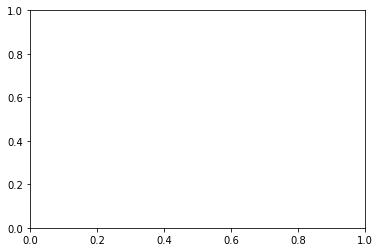

In [ ]:
plt.gca().add_patch(plt.Polygon(np.array([entry.get("wall.description_2d.vessel.annular.outline_outer.r"),
                                          entry.get("wall.description_2d.vessel.annular.outline_outer.z")]).transpose([1, 0]),
                                fill=False, closed=True))


for coil in entry.get("pf_active.coil"):
    rect = coil.get(["element", 0, "geometry", "rectangle"]).dump_named()
    plt.gca().add_patch(plt.Rectangle((rect.r-rect.width/2.0, rect.z -
                                       rect.height/2.0), rect.width, rect.height, fill=False))
plt.axis('scaled')

time_slice=50

dim1 = entry.get(["equilibrium", "time_slice", time_slice, "profiles_2d", "grid", "dim1"])
dim2 = entry.get(["equilibrium", "time_slice", time_slice, "profiles_2d", "grid", "dim2"])

plt.contour(dim1, dim2, entry.get(["equilibrium", "time_slice", time_slice, "profiles_2d", "psi"]).T, levels=20, linewidths=0.5,)


efit_time=entry.get(["equilibrium", "time"])

In [ ]:
eq = Equilibrium(entry.dump())

FileNotFoundError: Can not open mdsplus tree! tree_name=pcs_east shot=38300 tree_path=/home/salmon/workspace/data/efit_east mode=ReadOnly 
 %TREE-E-FOPENR, Error opening file read-only.

In [ ]:
eq.profiles_1d.ffprime

TypeError: pull() takes 1 positional argument but 2 were given

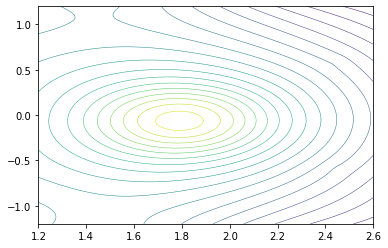

In [ ]:
dim1 = entry.get(["equilibrium", "time_slice", 0, "profiles_2d", "grid", "dim1"])
dim2 = entry.get(["equilibrium", "time_slice", 0, "profiles_2d", "grid", "dim2"])

plt.contour(dim1, dim2, entry.get(["equilibrium", "time_slice", 0, "profiles_2d", "psi"]).T, levels=20, linewidths=0.5,)


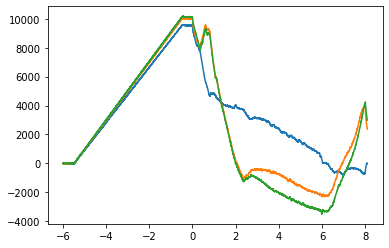

In [ ]:
current = [coil.get("current.data") for coil in entry.get("pf_active.coil")]

pcs_time=entry.get("pf_active.time")
plt.plot(pcs_time,current[1])
plt.plot(pcs_time,current[2])
plt.plot(pcs_time,current[3])

In [ ]:
from typing import Sequence


def as_path(*args, delimiter='.'):

    def _convert(v):
        if isinstance(v, str):
            return v.split(delimiter)
        elif not isinstance(v, Sequence):
            return [v]
        else:
            return v

    res = sum([_convert(v) for v in args], [])

    return res


In [ ]:
as_path("equilibrium.time_slice.0.profiles_1d.f")

['equilibrium', 'time_slice', '0', 'profiles_1d', 'f']

In [ ]:
list(5)

TypeError: 'int' object is not iterable

In [ ]:
"-5".isdigit()

False

In [ ]:
from fytok.fymodules.equilibrium import ATEC
from fytok.fymodules. import XiaoTaoTrans

prev_profile = init_profile

while True:
    next_eq = ATEC(prev_profile, prev_eq, wall)

    next_core_source = FooSouce(next_eq, ...)

    next_core_transport = FooTransport(next_eq, ...)

    next_profile = XiaoTaoTrans(next_eq, next_core_source, next_core_transport)

    if residual(prev_profile, next_profile) < 1.0e-5:
        break
    else:
        prev_eq = next_eq
        prev_profile = next_profile

res = {
    "equilibrium": next_eq,
    "core_profiles": next_profile
}
